In [11]:
import tensorflow as tf
from tensorflow import keras
from keras.models import load_model
from keras.layers import Dense, Flatten
from keras.models import Sequential
from keras.optimizers import Adam
     

In [5]:
import tensorflow as tf
print(tf.test.is_built_with_cuda())
print(tf.config.list_physical_devices('GPU'))

False
[]


In [3]:
import requests
import zipfile
from pathlib import Path

data_path = Path("data/")
image_path = data_path / "war_events"

if image_path.is_dir():
    print(f"{image_path} directory exists.")
else:
    print(f"Did not find {image_path} directory, creating one...")
    image_path.mkdir(parents=True, exist_ok=True)
    
    # Unzip pizza, steak, sushi data
    with zipfile.ZipFile(data_path / "training.zip", "r") as zip_ref:
        print("Unzipping...") 
        zip_ref.extractall(image_path)

data\war_events directory exists.


In [4]:
import os
def walk_through_dir(dir_path):
  """
  Walks through dir_path returning its contents.
  Args:
    dir_path (str or pathlib.Path): target directory
  
  Returns:
    A print out of:
      number of subdiretories in dir_path
      number of images (files) in each subdirectory
      name of each subdirectory
  """
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

In [5]:
walk_through_dir(image_path)

There are 2 directories and 0 images in 'data\war_events'.
There are 5 directories and 0 images in 'data\war_events\test'.
There are 0 directories and 25 images in 'data\war_events\test\combat'.
There are 0 directories and 25 images in 'data\war_events\test\destroyedbuilding'.
There are 0 directories and 25 images in 'data\war_events\test\fire'.
There are 0 directories and 25 images in 'data\war_events\test\humanitarianaid'.
There are 0 directories and 25 images in 'data\war_events\test\militaryvehicles'.
There are 5 directories and 0 images in 'data\war_events\train'.
There are 0 directories and 55 images in 'data\war_events\train\combat'.
There are 0 directories and 55 images in 'data\war_events\train\destroyedbuilding'.
There are 0 directories and 55 images in 'data\war_events\train\fire'.
There are 0 directories and 55 images in 'data\war_events\train\humanitarianaid'.
There are 0 directories and 55 images in 'data\war_events\train\militaryvehicles'.


In [6]:
train_dir = image_path / "train"
test_dir = image_path / "test"

train_dir, test_dir

(WindowsPath('data/war_events/train'), WindowsPath('data/war_events/test'))

Random image path: data\war_events\train\humanitarianaid\43.jpeg
Image class: humanitarianaid
Image height: 121
Image width: 417


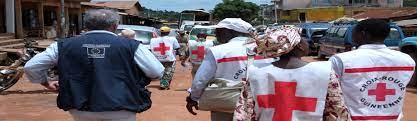

In [7]:
import random
from PIL import Image

# Set seed
random.seed(42) # <- try changing this and see what happens

# 1. Get all image paths (* means "any combination")
# image_path_list = list(image_path.glob("*/*/*.jpeg"))
image_path_list = list(image_path.glob("*/*/*"))
image_path_list = [path for path in image_path_list if path.suffix in {".jpg", ".jpeg",".png"}]
image_path_list
# 2. Get random image path
random_image_path = random.choice(image_path_list)

# 3. Get image class from path name (the image class is the name of the directory where the image is stored)
image_class = random_image_path.parent.stem

# 4. Open image
img = Image.open(random_image_path)

# 5. Print metadata
print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}") 
print(f"Image width: {img.width}")
img

In [8]:

img_height,img_width=64,64
batch_size=32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  train_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  test_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)
     

Found 275 files belonging to 5 classes.


Using 220 files for training.
Found 125 files belonging to 5 classes.
Using 25 files for validation.


In [9]:
class_names = train_ds.class_names
print(class_names)

['combat', 'destroyedbuilding', 'fire', 'humanitarianaid', 'militaryvehicles']


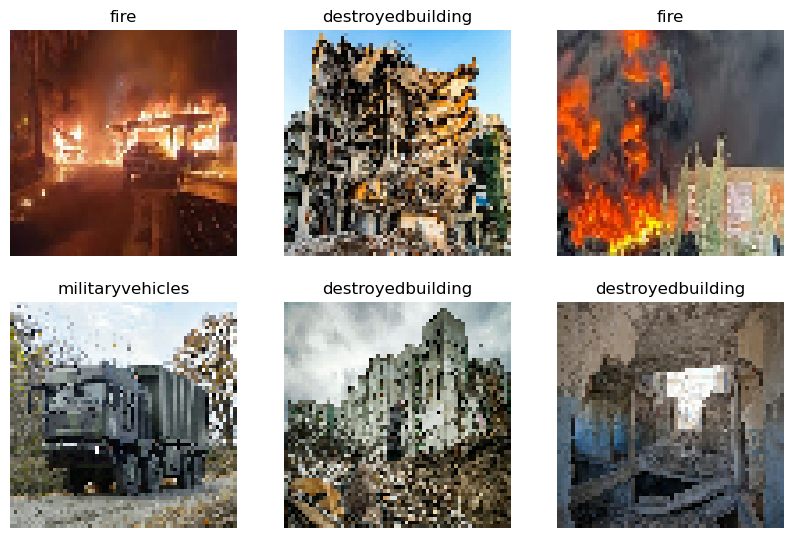

In [10]:

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(6):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")
     

In [51]:
resnet_model = Sequential()

pretrained_model= keras.applications.ResNet50(include_top=False,
                   input_shape=(64,64,3),
                   pooling='avg',classes=5,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(5, activation='softmax'))

In [52]:
resnet_model.compile(optimizer=Adam(learning_rate=0.01),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [53]:

epochs=10
history = resnet_model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10


7/7 [==============================] - 6s 355ms/step - loss: 37.0821 - accuracy: 0.3045 - val_loss: 3.0902 - val_accuracy: 0.5600
Epoch 2/10
7/7 [==============================] - 2s 213ms/step - loss: 3.4813 - accuracy: 0.5727 - val_loss: 2.5403 - val_accuracy: 0.5200
Epoch 3/10
7/7 [==============================] - 2s 231ms/step - loss: 1.1709 - accuracy: 0.7773 - val_loss: 0.8280 - val_accuracy: 0.7600
Epoch 4/10
7/7 [==============================] - 2s 252ms/step - loss: 0.2757 - accuracy: 0.9000 - val_loss: 0.6752 - val_accuracy: 0.7200
Epoch 5/10
7/7 [==============================] - 2s 249ms/step - loss: 0.1767 - accuracy: 0.9455 - val_loss: 0.5571 - val_accuracy: 0.7600
Epoch 6/10
7/7 [==============================] - 2s 247ms/step - loss: 0.0977 - accuracy: 0.9909 - val_loss: 0.6714 - val_accuracy: 0.7600
Epoch 7/10
7/7 [==============================] - 2s 290ms/step - loss: 0.0566 - accuracy: 0.9909 - val_loss: 0.6534 - val_accuracy: 0.8000
Epoch 8/10
7/7 [==============

In [59]:
resnet_model.save_weights('weights.keras')
resnet_model.save('trainedmodel.keras')